<a href="https://colab.research.google.com/github/Farzana34/iFeature/blob/master/Hungerian%2BCleveland_heart_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install smote-variants

     |████████████████████████████████| 143kB 8.5MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7454 sha256=a8a7c8d0665a2489da57b90c4ed2e4677674bfdba1d5587c13e8b30767fe1328
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=14e94aaa46084b6491625ee0f0ebe26dcd40daa71ae37a9a6d72d2bf54a893f7
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built statistics minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv


In [ ]:
import io
import pandas as pd


dataset= pd.read_csv(io.BytesIO(uploaded['heart_statlog_cleveland_hungary_final.csv']))

# **Without smote**

In [ ]:
X= dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values

minority class: 561
majority class: 629


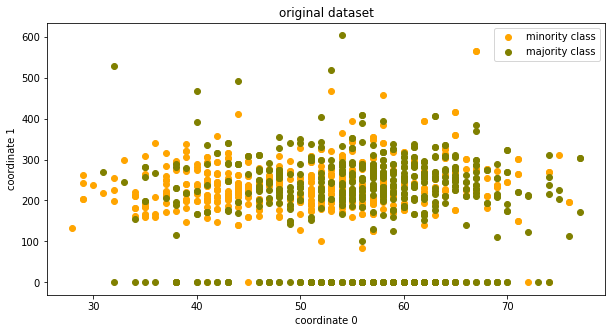

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,4], label='minority class', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], label='majority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

print('minority class: %d' % np.sum(y == 0))
print('majority class: %d' % np.sum(y == 1))


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


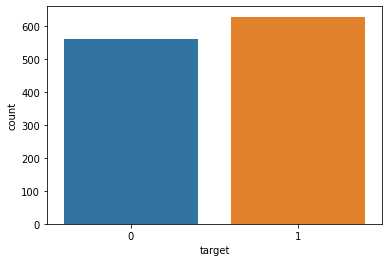

In [ ]:
import seaborn as sns
sns.countplot(dataset['target'])

In [ ]:

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 561
minority class: 629


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

Accuracy: 
85.71428571428571
[[ 89  18]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

10 fold cross validation
83.27731092436976
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       561
           1       0.85      0.83      0.84       629

    accuracy                           0.83      1190
   macro avg       0.83      0.83      0.83      1190
weighted avg       0.83      0.83      0.83      1190



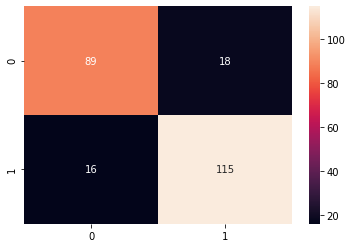

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
y_pred=nb1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X, y, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X, y, cv=10)
print(classification_report(y,predictions))

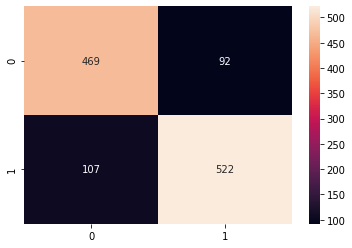

In [ ]:
sns.heatmap(confusion_matrix(y,predictions),annot=True,fmt="0.0f")

 Decission tree accuracy:  89.07563025210085
[[ 99   8]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.93      0.86      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

90.33613445378151
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       561
           1       0.91      0.90      0.91       629

    accuracy                           0.90      1190
   macro avg       0.90      0.90      0.90      1190
weighted avg       0.90      0.90      0.90      1190



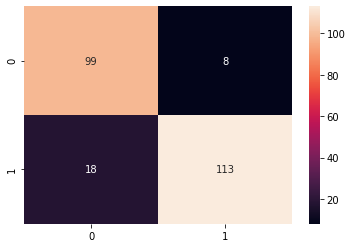

In [ ]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.metrics import accuracy_score
 from sklearn.model_selection import cross_val_score
 clf_tree = DecisionTreeClassifier(random_state=0)

 clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print (" Decission tree accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_tree, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_tree, X, y, cv=10)
print(classification_report(y,predictions))

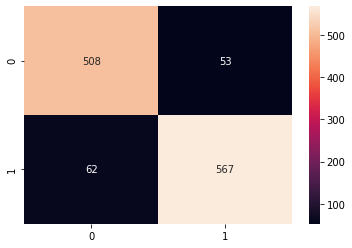

In [ ]:
sns.heatmap(confusion_matrix(y,predictions),annot=True,fmt="0.0f")

random Forest accuracy:  95.37815126050421
[[ 99   8]
 [  3 128]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.94      0.98      0.96       131

    accuracy                           0.95       238
   macro avg       0.96      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238

92.18487394957982
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       561
           1       0.91      0.94      0.93       629

    accuracy                           0.92      1190
   macro avg       0.92      0.92      0.92      1190
weighted avg       0.92      0.92      0.92      1190



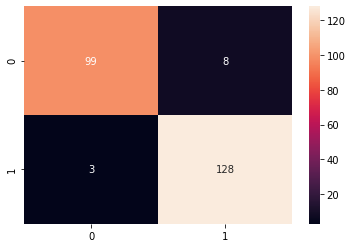

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")

scores = cross_val_score(clf_rf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X, y, cv=10)
print(classification_report(y,predictions))

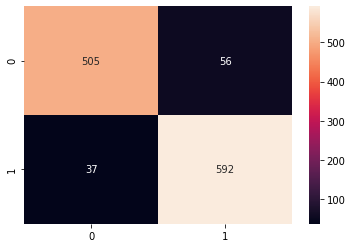

In [ ]:
sns.heatmap(confusion_matrix(y,predictions),annot=True,fmt="0.0f")

# **With smote**

In [ ]:
import smote_variants as sv
oversampler= sv.SMOTE()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-23 10:49:51,170:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-23 10:49:51,183:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-23 10:49:51,192:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 68
minority new samples: 0


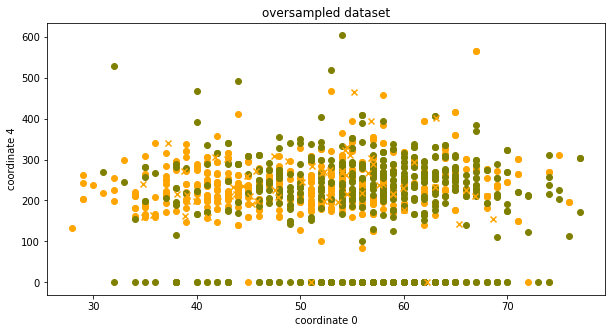

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,4], label='new minority samples', c='orange', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


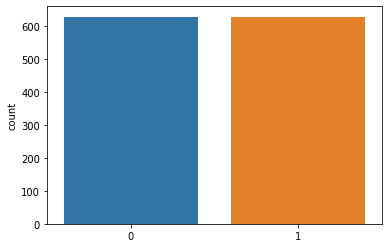

In [ ]:
sns.countplot(y_oversample)

Accuracy: 
85.71428571428571
[[ 89  18]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

10 fold cross validation
83.62031746031747
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       629
           1       0.84      0.83      0.84       629

    accuracy                           0.84      1258
   macro avg       0.84      0.84      0.84      1258
weighted avg       0.84      0.84      0.84      1258



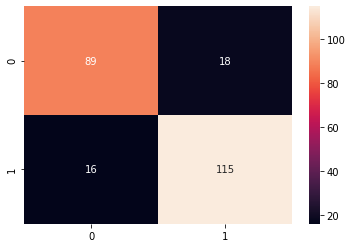

In [ ]:
nb1 = GaussianNB()
nb1.fit(Xtrain_oversample, ytrain_oversample)
y_pred=nb1.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X_oversample, y_oversample, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

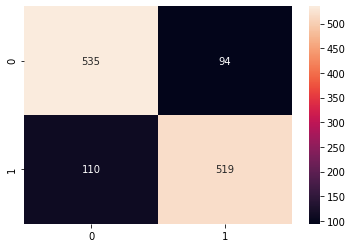

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

 Decission tree accuracy:  89.91596638655463
[[ 99   8]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       107
           1       0.93      0.88      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238

88.88126984126984
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       629
           1       0.90      0.88      0.89       629

    accuracy                           0.89      1258
   macro avg       0.89      0.89      0.89      1258
weighted avg       0.89      0.89      0.89      1258



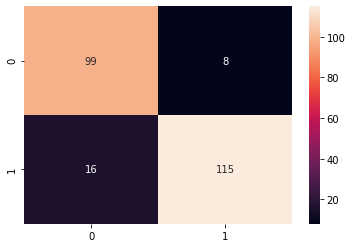

In [ ]:
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_tree.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print (" Decission tree accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_tree, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_tree, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

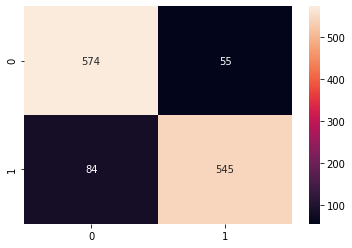

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

random Forest accuracy:  94.53781512605042
[[ 99   8]
 [  5 126]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.94      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

92.68825396825397
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       629
           1       0.92      0.94      0.93       629

    accuracy                           0.93      1258
   macro avg       0.93      0.93      0.93      1258
weighted avg       0.93      0.93      0.93      1258



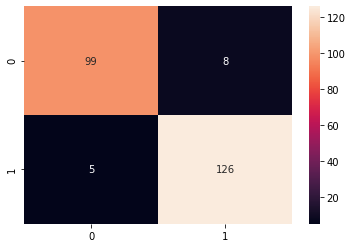

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_rf, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

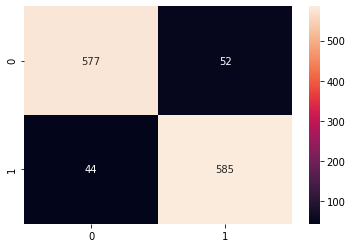

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

# **With smote veriant**

In [ ]:
import smote_variants as sv
oversampler= sv.distance_SMOTE()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-23 10:51:30,561:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-23 10:51:30,577:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-23 10:51:30,586:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()

In [ ]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 68
minority new samples: 0


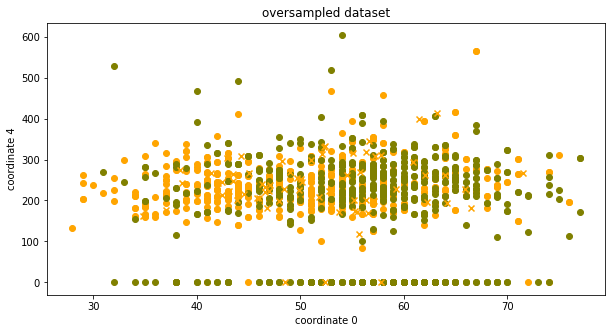

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,4], label='new minority samples', c='orange', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


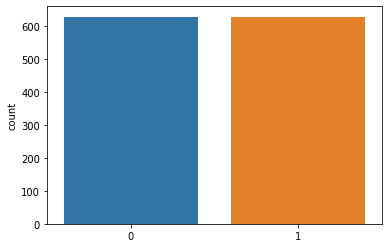

In [ ]:
sns.countplot(y_oversample)

Accuracy: 
85.71428571428571
[[ 89  18]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

10 fold cross validation
83.46222222222221
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       629
           1       0.84      0.83      0.83       629

    accuracy                           0.83      1258
   macro avg       0.83      0.83      0.83      1258
weighted avg       0.83      0.83      0.83      1258



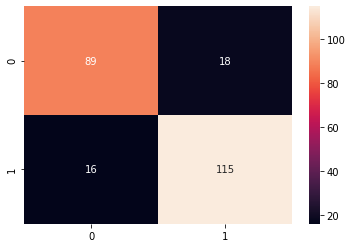

In [ ]:
nb1 = GaussianNB()
nb1.fit(Xtrain_oversample, ytrain_oversample)
y_pred=nb1.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X_oversample, y_oversample, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

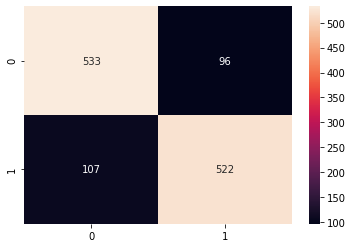

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

 Decission tree accuracy:  88.65546218487394
[[ 99   8]
 [ 19 112]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.93      0.85      0.89       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

88.24825396825396
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       629
           1       0.89      0.87      0.88       629

    accuracy                           0.88      1258
   macro avg       0.88      0.88      0.88      1258
weighted avg       0.88      0.88      0.88      1258



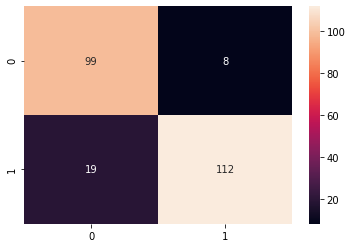

In [ ]:
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_tree.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print (" Decission tree accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_tree, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_tree, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

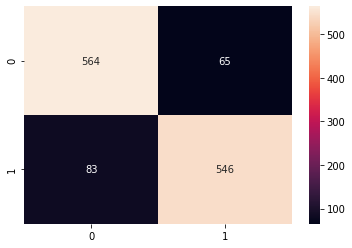

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

random Forest accuracy:  94.11764705882352
[[ 97  10]
 [  4 127]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       107
           1       0.93      0.97      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238

92.37079365079366
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       629
           1       0.92      0.93      0.92       629

    accuracy                           0.92      1258
   macro avg       0.92      0.92      0.92      1258
weighted avg       0.92      0.92      0.92      1258



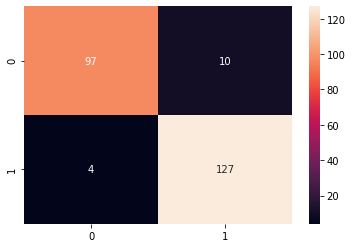

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_rf, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))


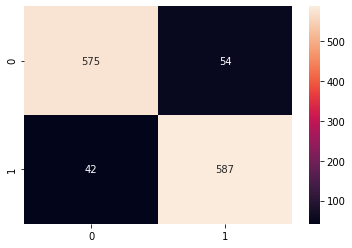

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")